In [53]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style='whitegrid',palette='tab10')
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import dates as mpl_dates
%matplotlib inline

In [35]:
df=pd.read_csv('train.csv',parse_dates=['datetime'])   #Pandas know that these are dates.
# y=df['count']
# df.set_index(['datetime'],inplace=True)


In [36]:
df.head(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [39]:
df.dtypes  # Proper Format?

datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
dtype: object

In [5]:
df.shape


(10886, 12)

In [7]:
df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [8]:
df.describe()
#Casual has high stdv --> Maybe because they arent regular users and dont depend on bike. For this maybe look in weather and time
# in comparison with registered users
# no missing data values in the set


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [9]:
df['datetime'].min()   #earlist date

Timestamp('2011-01-01 00:00:00')

In [10]:
df['datetime'].max()  #last stamp

Timestamp('2012-12-19 23:00:00')

In [40]:
df['datetime'].max() - df['datetime'].min()   #timedelta

Timedelta('718 days 23:00:00')

In [41]:
df['hour'] = df['datetime'].dt.hour

In [42]:
df.corr().round(2)
#heatmap in Graphics

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour
season,1.00,0.03,-0.01,0.01,0.26,0.26,0.19,-0.15,0.10,0.16,0.16,-0.01
holiday,0.03,1.00,-0.25,-0.01,0.00,-0.01,0.00,0.01,0.04,-0.02,-0.01,-0.00
workingday,-0.01,-0.25,1.00,0.03,0.03,0.02,-0.01,0.01,-0.32,0.12,0.01,0.00
weather,0.01,-0.01,0.03,1.00,-0.06,-0.06,0.41,0.01,-0.14,-0.11,-0.13,-0.02
temp,0.26,0.00,0.03,-0.06,1.00,0.98,-0.06,-0.02,0.47,0.32,0.39,0.15
atemp,0.26,-0.01,0.02,-0.06,0.98,1.00,-0.04,-0.06,0.46,0.31,0.39,0.14
humidity,0.19,0.00,-0.01,0.41,-0.06,-0.04,1.00,-0.32,-0.35,-0.27,-0.32,-0.28
windspeed,-0.15,0.01,0.01,0.01,-0.02,-0.06,-0.32,1.00,0.09,0.09,0.10,0.15
casual,0.10,0.04,-0.32,-0.14,0.47,0.46,-0.35,0.09,1.00,0.50,0.69,0.30
registered,0.16,-0.02,0.12,-0.11,0.32,0.31,-0.27,0.09,0.50,1.00,0.97,0.38


## Graphics Grasp

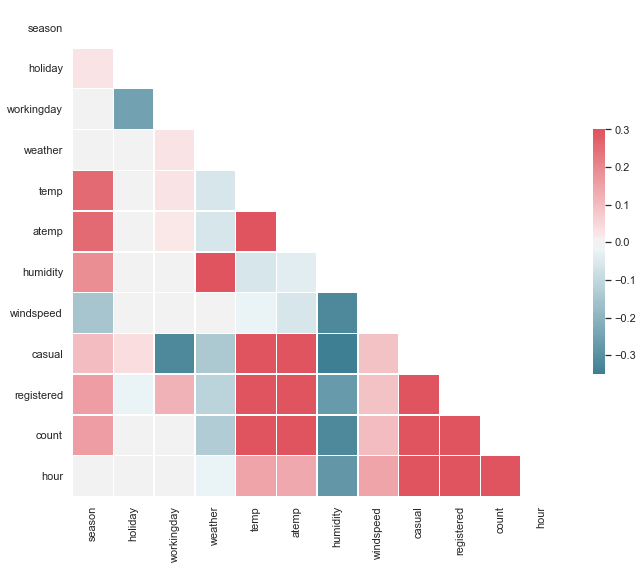

In [54]:
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr.round(2), mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

#negative correlation Casual on wordays, registered correlate with workday
#negative correlation Casual with high humidity and windspeed
#Temperature is more correlated with casual than registered, but both are correlated
#Registered and casual correlate with season
# High Correlation with Daytime

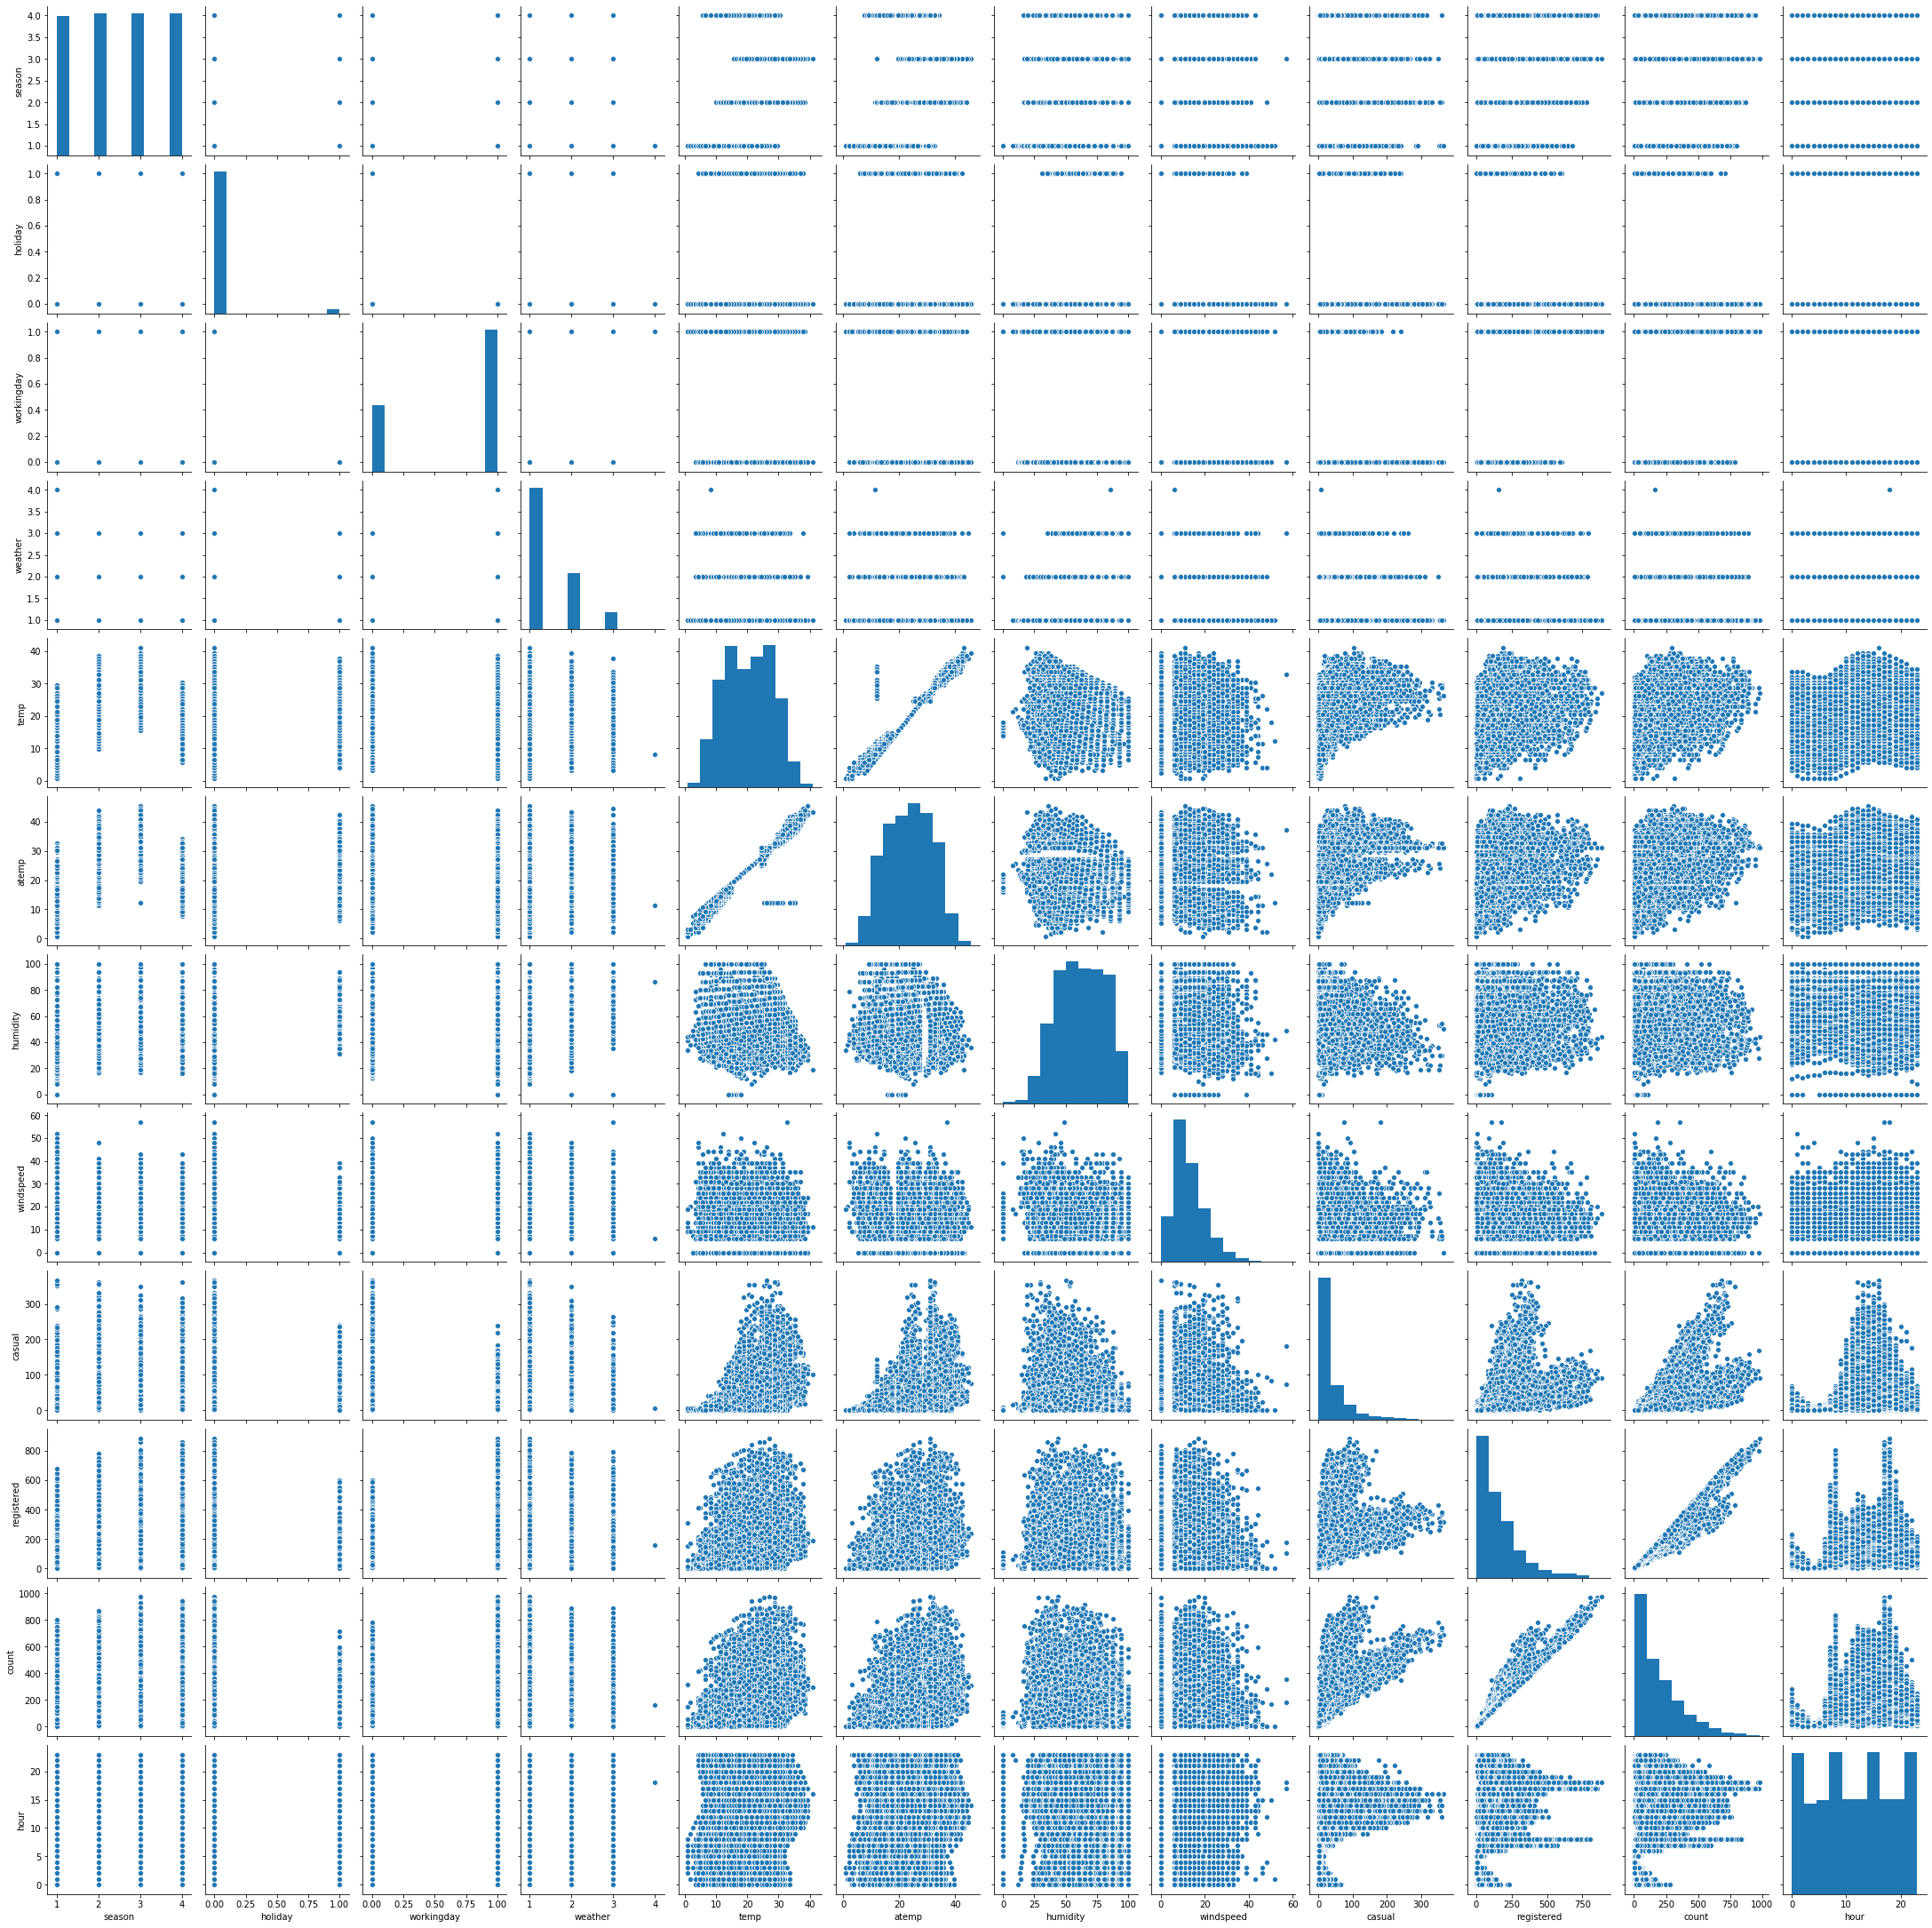

In [44]:
sns.pairplot(df)

#Temp / A Temp positive direction with Casual
# Casual prefer Daytime
#Registered are in working intervall

ValueError: 'bar' is not a valid value for ls; supported values are '-', '--', '-.', ':', 'None', ' ', '', 'solid', 'dashed', 'dashdot', 'dotted'

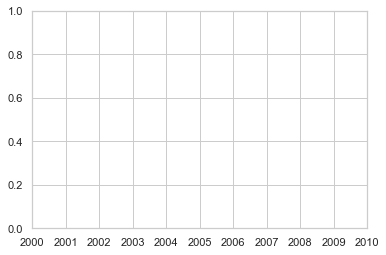

In [82]:
# df['count'].plot.line(grid=True)
plt.plot(df['datetime'],df['count'],linestyle='bar')
plt.plot(df['datetime'],df['weather'], label='weather')

plt.title ("Datetime")
plt.xlabel('Years')
plt.ylabel('Count')

plt.show()
#Updward Trend
#Seasonal Trends April - November 2011 & 2012


In [46]:
df_season=df.groupby(['season'])

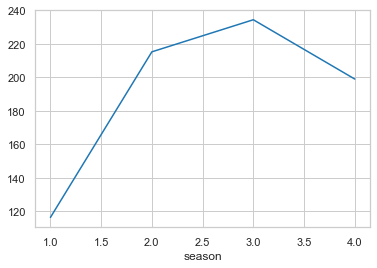

In [56]:
df_season['count'].mean().plot()
# Seperate the year

In [48]:
df_hour=df.groupby('hour')

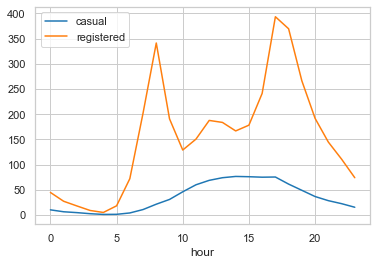

In [57]:

df_hour[['casual','registered']].mean().plot()
#Peak at around 8 
#Peak at 16 clock
# Registered user seem to depend on the bike for getting to work?


In [50]:
bad_weather=df['weather']>=3 

In [51]:
bad_weather_df=df.loc[bad_weather,['registered','casual','hour']]

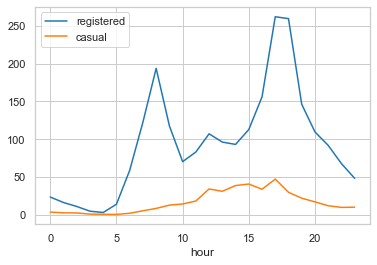

In [58]:
bad_weather_df.groupby('hour').mean().plot()

## Train Test Split

In [ ]:
df.columns

In [ ]:
X=df[['season','weather','humidity','windspeed','temp','workingday','registered','casual']]
y=df['count']
from sklearn.model_selection import train_test_split   ##Split Data 75 Train 25 test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


## Feature Engineering ## 

In [ ]:
df['hour'] = df['datetime'].dt.hour

In [ ]:
df.loc[(df['datetime']>='2011') & (df['season']==1)]

In [ ]:
df['month']=df['datetime'].dt.month_name()
df['day']=df['datetime'].dt.day_name()#Access the DT class on the series object .dt  now we can access the whole class


In [ ]:
df.set_index('datetime',inplace=True)

In [ ]:
df['2011']['count'] #Slicing because of index

In [ ]:
df.resample('W').sum().plot()

In [ ]:
df.resample('D').agg({'count':'sum','season':'min'}).plot()

In [ ]:
df

In [ ]:
df.rolling(window=350).mean().plot()

In [ ]:
# X_train.dtypes
#datetime is an object --> timeseries
dates=pd.date_range('2011-01-01', freq='1h', periods=10)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
m=LinearRegression()

In [ ]:
df.loc[2011]

In [ ]:
# df.dtypes #date is now an timeseries

In [ ]:
# X_train.info()  ##non Null --> dataset complete

In [ ]:
# df.set_index('datetime',inplace=True)

In [28]:
# df.describe()
#Season std 1.116
temp std 7.79
#weather 0.63
humidity 19.24

SyntaxError: invalid syntax (<ipython-input-28-e5e495a6c115>, line 3)

In [31]:
y=df['

SyntaxError: EOL while scanning string literal (<ipython-input-31-1a0241484d67>, line 1)

In [32]:
y=df['

SyntaxError: EOL while scanning string literal (<ipython-input-32-1a0241484d67>, line 1)